# Loan Application Approval Project

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status - CLASSIFICATION PROBLEM

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import recall_score

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
from sklearn.model_selection import GridSearchCV

from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")
import pickle


In [6]:
df=pd.read_csv("loan_prediction.csv")

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
df.shape

(614, 13)

In [10]:
df.describe(include="all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001469,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


- There are 614 samples with some features having null values.
- 5 numerical features & 8 are categorical features
- We have a class imbalance in our target variable with 422 counts of "Yes" out of 614, indicating that class imbalance technique needs to be used for an efficient model.

Y    422
N    192
Name: Loan_Status, dtype: int64


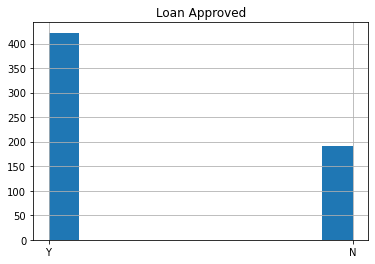

In [11]:
print(df["Loan_Status"].value_counts())
df["Loan_Status"].hist(grid=True)
plt.title("Loan Approved")
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
cat_df=df.select_dtypes(include="object")
num_df=df.select_dtypes(exclude="object")

In [14]:
num_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [15]:
cat_df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We have null values, which we can impute later as they do not comprise of a larger percent of the feature column and imputing earlier can hinder insightful plots which can cause problems.

In [17]:
for i in cat_df.columns:
    print(df[i].value_counts())
    print("\n")

LP001469    1
LP001114    1
LP002494    1
LP001743    1
LP001616    1
           ..
LP001846    1
LP001990    1
LP002225    1
LP001603    1
LP001872    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Y    422
N    192
Name: Loan_Status, dtype: int64




So we don't have any quirky unique values like a space or a "?" in categorical values. So, we can proceed with EDA.

# EDA:

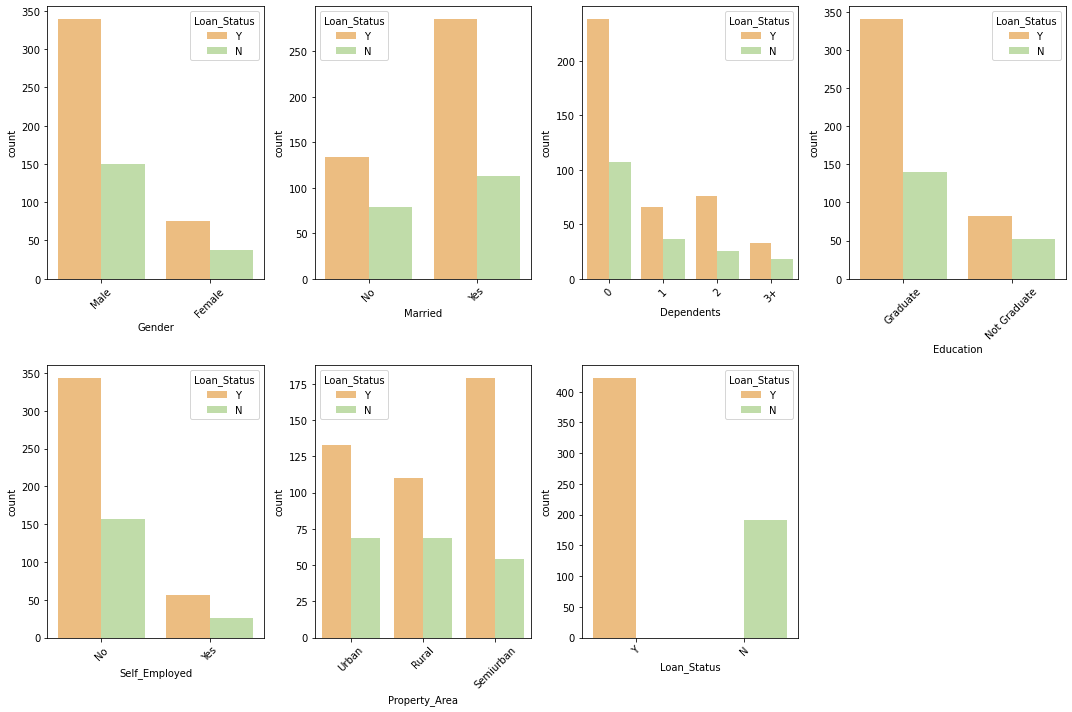

In [18]:
plt.figure(figsize=(15,10))
x=1
for col in cat_df.columns[1:]:
    
    if x<=8:
        plt.subplot(2,4,x)
        sns.countplot(data=df, x=col,hue="Loan_Status",palette="Spectral")       
        plt.xticks(rotation=45)
        x+=1
plt.tight_layout()
plt.show()

Observations:
- Men and women are likely to have roughly 50-50 chance at being approved for a loan. Data samples for men is greater than women.
- Married People are less likely to be rejected for a loan and have a humongous loan approval chance over unmarried people.
- With no dependents, it was extremely likely to be approved for a loan whereas with 2 dependents loan approval chance was higher than with 1 dependent. 
- Graduate people are more likely to be approved for a loan.
- Self-employed people were less likely to be approved for a loan as there is no assurance for the banks whether the person would be able to consistently earn and have the same potential to pay back when they were applying for the loan.
- Semiurban aread have a high chance of loan approval compared to rural and urban. It's also the same for loan rejection scenario where semiurban residents were less likely to receive rejection compared to other settings.

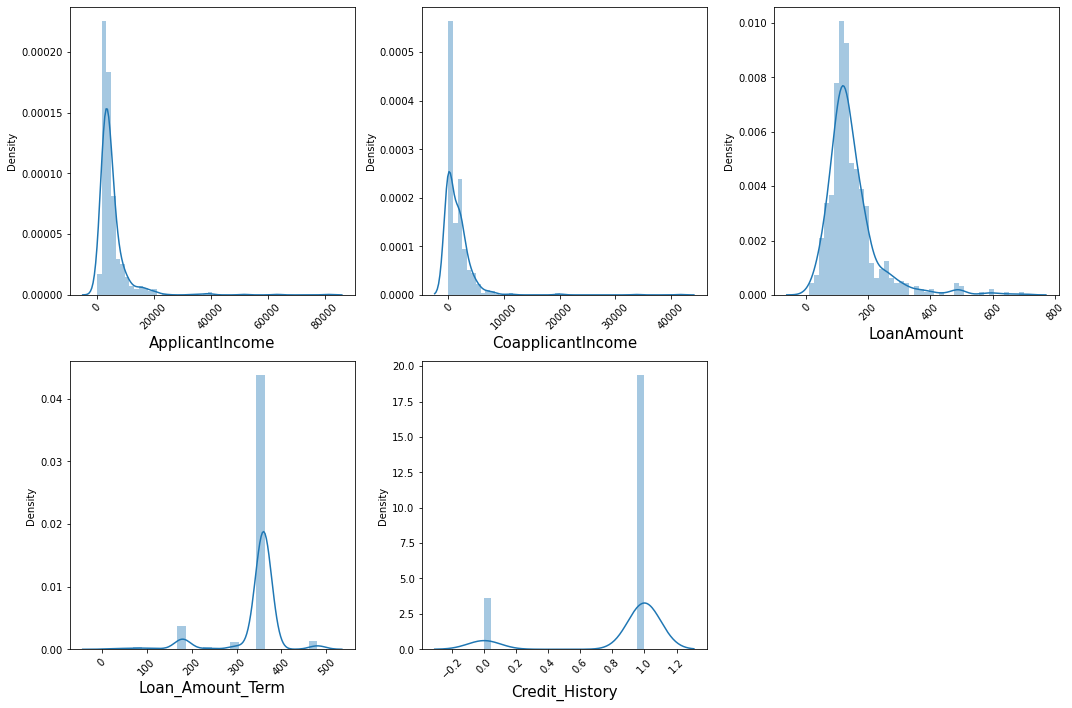

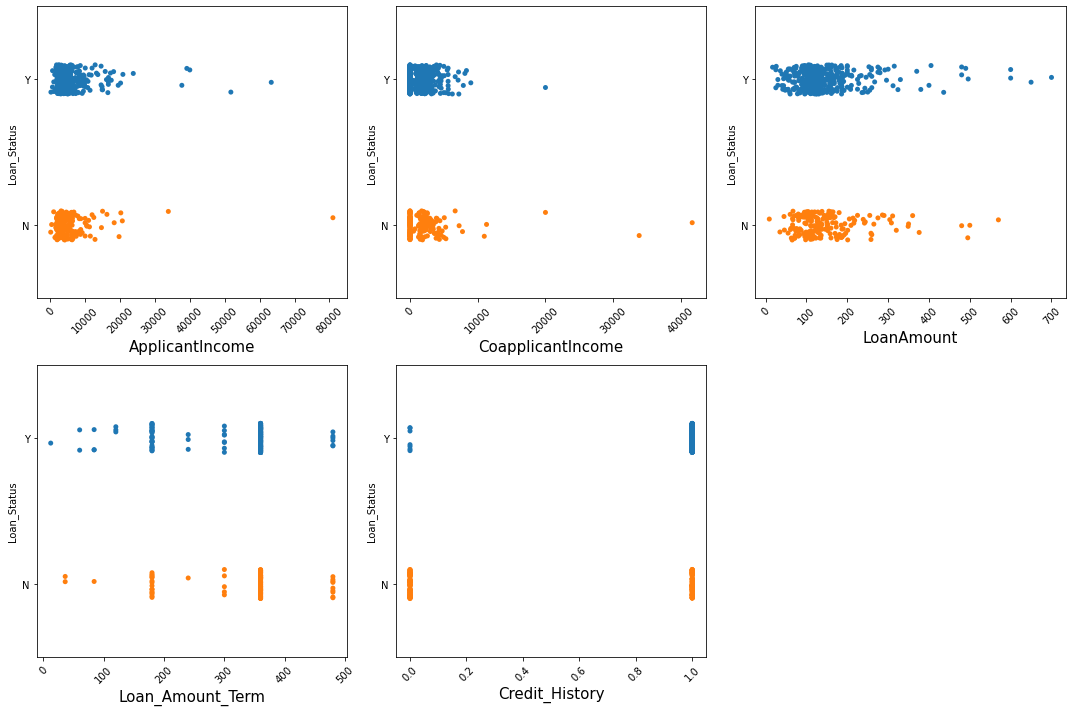

In [19]:

plt.figure(figsize=(15,10))
number=1

for col in num_df.columns:
    if number<=6:
        ax=plt.subplot(2,3,number)
        sns.distplot(num_df[col])         
        plt.xlabel(col,fontsize=15)
        plt.xticks(rotation=45)
        number+=1
plt.tight_layout()
plt.show()
plt.figure(figsize=(15,10))
num=1
for col in num_df.columns:
    if num<=6:
        ax=plt.subplot(2,3,num)
        sns.stripplot(y="Loan_Status",x=col,data=df)        
        plt.xlabel(col,fontsize=15)
        plt.xticks(rotation=45)
        num+=1
plt.tight_layout()
plt.show()

Observation:
- Approved applicants have an income below 20,000 and majority of them lies below 10,000, similar chances of being rejected below 10,000.
- Majority of the co applicant income lies below 5000
- Maximum credit history is 1
- Loan amount is maximum at 175
- Loan amount term peaks around 350
- co applicant with higher income got rejected indicating how it wasn't making a big impact on loan approval.
- Loan amount below 250 was most likely to be approved by the bank.
- at loan amount 190 and 350, chances of being approved or rejected for a loan were 50% equally.


<AxesSubplot:>

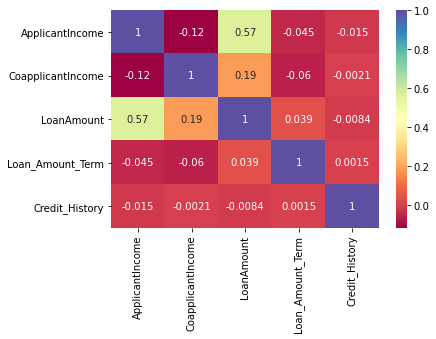

In [20]:
sns.heatmap(df.corr(),annot=True,cmap="Spectral")

Now we can proceed with imputation and data transformation!

## Data Transformation:

In [21]:
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(614, 13)

No duplicated were present in the dataset.

In [23]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean(),inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mean(),inplace=True)
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)

In [25]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We've successfully imputed the Nan values in both nymerical and categorical values.

In [26]:
cat_df=df.select_dtypes(include="object")
num_df=df.select_dtypes(exclude="object")

### Checking Outliers:

<AxesSubplot:>

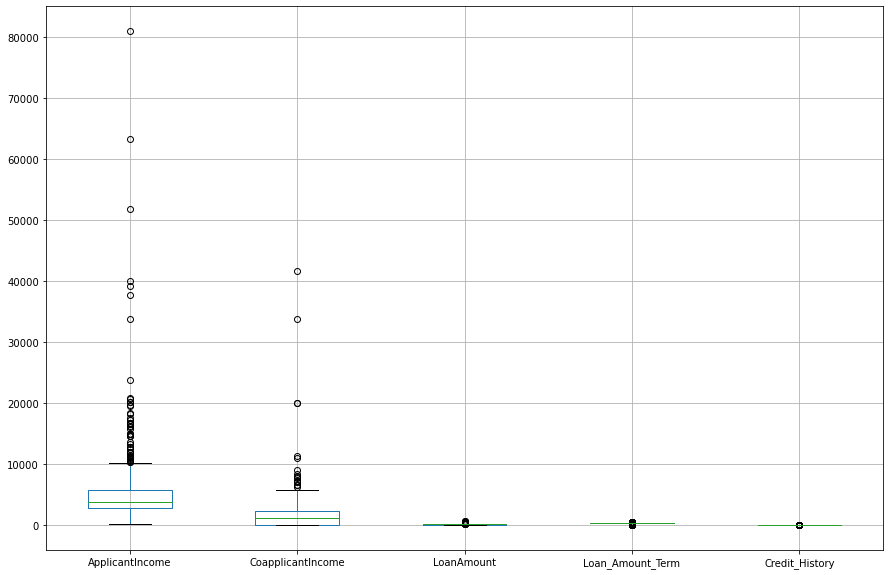

In [27]:
plt.figure(figsize=(15,10))
df.boxplot()

All the columns are containing outliers.

In [28]:
z=np.abs(zscore(num_df))
threshold=3
df_new=df[(z<3).all(axis=1)]

In [29]:
df_new.shape

(577, 13)

### Check Skewness: 

In [30]:
df_new.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.921860
dtype: float64

In [31]:
for col in num_df.columns:
    df_new[col]=np.log1p(df_new[col])

In [32]:
df_new.skew()

ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.697883
Loan_Amount_Term    -2.724482
Credit_History      -1.944692
dtype: float64

The skewness has reduced quite a bit for first three columns but not for the last 2 features.

### Encoding target column:

In [33]:
le=LabelEncoder()

In [34]:
df_new["Loan_Status"]=le.fit_transform(df_new['Loan_Status'])
df_new["Loan_Status"]

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [35]:
df['Loan_ID'].value_counts()

LP001469    1
LP001114    1
LP002494    1
LP001743    1
LP001616    1
           ..
LP001846    1
LP001990    1
LP002225    1
LP001603    1
LP001872    1
Name: Loan_ID, Length: 614, dtype: int64

We can drop "Loan ID", as its ordinal and each value is unique in nature and wont help model to gain any useful information.

In [36]:
df_new.drop(["Loan_ID"],inplace=True,axis=1)

In [37]:
df_new.shape

(577, 12)

Now, we know that plots  applicant Income and Co Applicant Income were similar. So we can actually merge the information provifded by these features into one and make it easier for the model to gain insights of 2 columns from one and reduce the time in model making.

In [38]:
df_new['All_Income'] = df_new['ApplicantIncome'] + df_new['CoapplicantIncome']
df_new.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1,inplace=True)

In [39]:
cat_df=df_new.select_dtypes(include="object")
num_df=df_new.select_dtypes(exclude="object")

Let's update the num and cat_df with the imputed dataframe.

<AxesSubplot:>

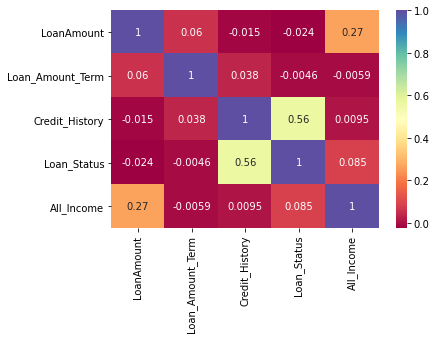

In [40]:
sns.heatmap(num_df.corr(),annot=True,cmap="Spectral")

Multicollinearity is there between Credit_history and Loan_Status, but its low and we can ignore it.

In [41]:
cat_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object')

Excluding the target variable which we have encoded earlier!

## Encoding:

In [42]:
for col in cat_df.columns:
    df_new[col]=le.fit_transform(df_new[col])

In [43]:
df_new.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,All_Income
0,1,0,0,0,0,4.993232,5.888878,0.693147,2,1,8.674197
1,1,1,1,0,0,4.859812,5.888878,0.693147,0,0,15.749530
2,1,1,0,0,1,4.204693,5.888878,0.693147,2,1,8.006701
3,1,1,0,1,0,4.795791,5.888878,0.693147,2,1,15.623087
4,1,0,0,0,0,4.955827,5.888878,0.693147,2,1,8.699681


### Splitting the dataset:

In [44]:
x=df_new.drop(columns=["Loan_Status"])
y=df_new['Loan_Status']

In [45]:
x

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,All_Income
0,1,0,0,0,0,4.993232,5.888878,0.693147,2,8.674197
1,1,1,1,0,0,4.859812,5.888878,0.693147,0,15.749530
2,1,1,0,0,1,4.204693,5.888878,0.693147,2,8.006701
3,1,1,0,1,0,4.795791,5.888878,0.693147,2,15.623087
4,1,0,0,0,0,4.955827,5.888878,0.693147,2,8.699681
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,4.276666,5.888878,0.693147,0,7.972811
610,1,1,3,0,0,3.713572,5.198497,0.693147,0,8.320448
611,1,1,1,0,0,5.537334,5.888878,0.693147,2,14.481077
612,1,1,2,0,0,5.236442,5.888878,0.693147,2,8.933796


In [46]:
sc=StandardScaler()
xs=sc.fit_transform(x)

### Best Random State:

In [165]:
maxAccu=0
maxRS=0
for i in range(1,500):
    x_train, x_test,y_train, y_test=train_test_split(xs,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.9103448275862069 on Random State 494


In [47]:
X_train, X_test, y_train, y_test = train_test_split(xs, y, test_size=0.25, random_state=494)
sm = SMOTE(random_state=494)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [48]:
y_train.value_counts()

0    285
1    285
Name: Loan_Status, dtype: int64

In [49]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

## Model1: Logistic Regression

In [169]:
log_reg_params = {"penalty": ['l1', 'l2','elasticnet','none'], 'C': [0.01, 0.1, 1, 10],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params)
rand_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = rand_log_reg.best_estimator_
print("Best Parameters for Logistic Regression: ", rand_log_reg.best_params_)
print("Best Score for Logistic Regression: ", rand_log_reg.best_score_)
print("------------------------------------------")

Best Parameters for Logistic Regression:  {'solver': 'saga', 'penalty': 'l2', 'C': 1}
Best Score for Logistic Regression:  0.7070175438596491
------------------------------------------


In [170]:
lr = LogisticRegression(solver='saga',C= 1, penalty= 'l2').fit(X_train, y_train)
pred_train = lr.predict(X_train)
pred_test = lr.predict(X_test)

In [171]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.54      0.62      0.58        32
           1       0.89      0.85      0.87       113

    accuracy                           0.80       145
   macro avg       0.71      0.74      0.72       145
weighted avg       0.81      0.80      0.80       145



In [173]:
pred_lr = lr.predict(X_test)
lss = accuracy_score(y_test,pred_lr)
for k in range(2,10):
    lsscore=cross_val_score(lr,xs,y,cv=k)
    lsc=lsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",lsc*100)
    print("accuracy score is : ",lss*100)
    print("\n")

At cv=  2
Cross Val score :  81.45905420991926
accuracy score is :  80.0


At cv=  3
Cross Val score :  81.11057138744962
accuracy score is :  80.0


At cv=  4
Cross Val score :  81.2823275862069
accuracy score is :  80.0


At cv=  5
Cross Val score :  81.80809595202398
accuracy score is :  80.0


At cv=  6
Cross Val score :  81.79947021764032
accuracy score is :  80.0


At cv=  7
Cross Val score :  81.81646446412829
accuracy score is :  80.0


At cv=  8
Cross Val score :  81.8017503805175
accuracy score is :  80.0


At cv=  9
Cross Val score :  81.80288461538461
accuracy score is :  80.0




At cv=  3
- Cross Val score :  81.11057138744962
- accuracy score is :  80.0

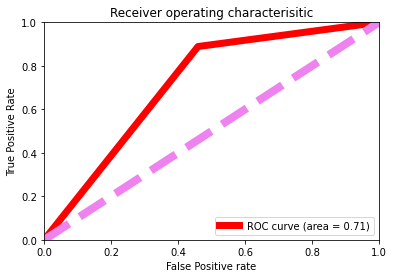

In [174]:
fpr,tpr,thresholds = roc_curve(pred_test,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="red",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="violet",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

In general, an AUC of 0.5 suggests no discrimination , 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding

## Model 2: Decision Tree Classifier

In [175]:
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,30,1)), 
                  "min_samples_leaf":  list(range(5,20,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
print("Best Parameters for Decision Tree: ", grid_tree.best_params_)
print("Best Score for Decision Tree: ", grid_tree.best_score_)

Best Parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 6}
Best Score for Decision Tree:  0.7385964912280703


In [176]:
dec_tree = DecisionTreeClassifier(criterion='gini', max_depth=19, min_samples_leaf=6).fit(X_train, y_train)
pred_train2 = dec_tree.predict(X_train)
pred_test2 = dec_tree.predict(X_test) 

In [177]:
print(classification_report(y_test,pred_test2))

              precision    recall  f1-score   support

           0       0.44      0.75      0.56        32
           1       0.91      0.73      0.81       113

    accuracy                           0.74       145
   macro avg       0.68      0.74      0.69       145
weighted avg       0.81      0.74      0.76       145



<AxesSubplot:title={'center':'Feature Importances of Decision Tree'}, xlabel='Importance'>

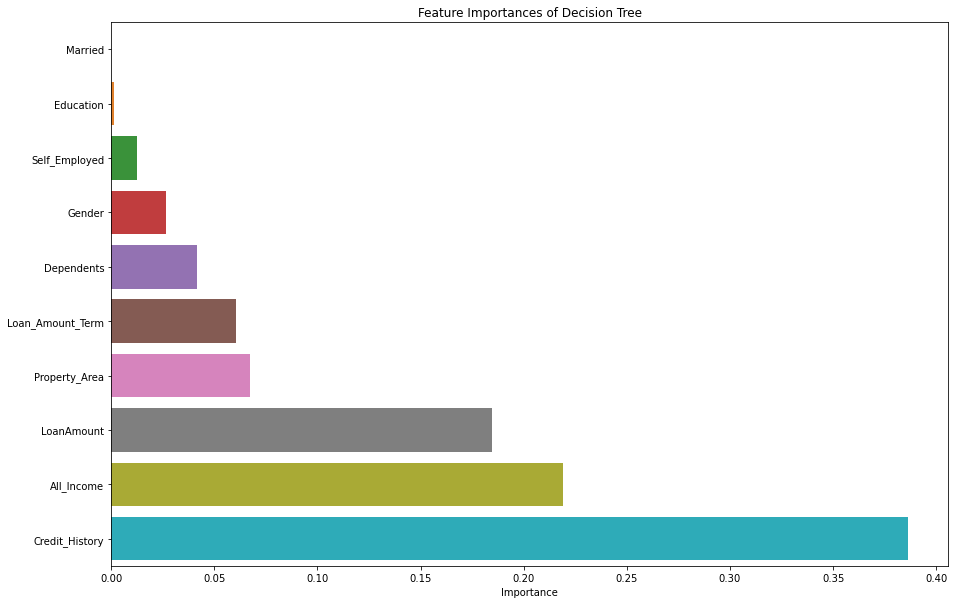

In [179]:
feat=pd.DataFrame({"Importance": tree_clf.feature_importances_}, 
                  index=x.columns).sort_values(by="Importance")
plt.figure(figsize=(15,10))
plt.title("Feature Importances of Decision Tree")

sns.barplot(feat["Importance"],feat.index)

In [181]:
pred_dt = dec_tree.predict(X_test)
dts = accuracy_score(y_test,pred_dt)
for k in range(2,10):
    dtscore=cross_val_score(dec_tree,xs,y,cv=k)
    dtc=dtscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",dtc*100)
    print("accuracy score is : ",dts*100)
    print("\n")

At cv=  2
Cross Val score :  72.09727028066129
accuracy score is :  73.79310344827587


At cv=  3
Cross Val score :  74.87226540011514
accuracy score is :  73.79310344827587


At cv=  4
Cross Val score :  74.34506704980843
accuracy score is :  73.79310344827587


At cv=  5
Cross Val score :  73.47976011994002
accuracy score is :  73.79310344827587


At cv=  6
Cross Val score :  73.48045532646047
accuracy score is :  73.79310344827587


At cv=  7
Cross Val score :  73.3155618991646
accuracy score is :  73.79310344827587


At cv=  8
Cross Val score :  71.91305175038052
accuracy score is :  73.79310344827587


At cv=  9
Cross Val score :  72.78044871794872
accuracy score is :  73.79310344827587




At cv=  5
- Cross Val score :  73.47976011994002
- accuracy score is :  73.79310344827587

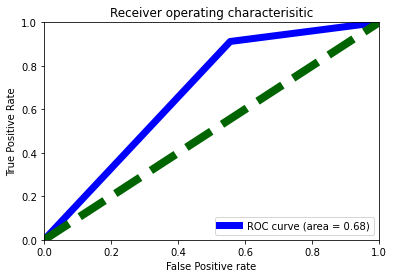

In [182]:
fpr,tpr,thresholds = roc_curve(pred_test2,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 3: Random Forest Classifier

In [183]:
forest_params = {"bootstrap":[True, False], "max_depth": list(range(2,10,1)),
                  "min_samples_leaf": list(range(5,20,1)),"n_estimators":[100,150,200,250,300,350]}
rand_forest = RandomizedSearchCV(RandomForestClassifier(), forest_params)
rand_forest.fit(X_train, y_train)
# forest best estimator
forest_clf = rand_forest.best_estimator_
print("Best Parameters for Random Forest: ", rand_forest.best_params_)
print("Best Score for Random Forest: ", rand_forest.best_score_)
print("\n")

Best Parameters for Random Forest:  {'n_estimators': 200, 'min_samples_leaf': 9, 'max_depth': 8, 'bootstrap': False}
Best Score for Random Forest:  0.7771929824561403




In [184]:
rfc = RandomForestClassifier(bootstrap=False, max_depth=8, min_samples_leaf=9,n_jobs=4,n_estimators=200).fit(X_train, y_train)
pred_train3 = rfc.predict(X_train)
pred_test3 = rfc.predict(X_test) 

<AxesSubplot:title={'center':'Feature Importances of Random Forest'}, xlabel='Importance'>

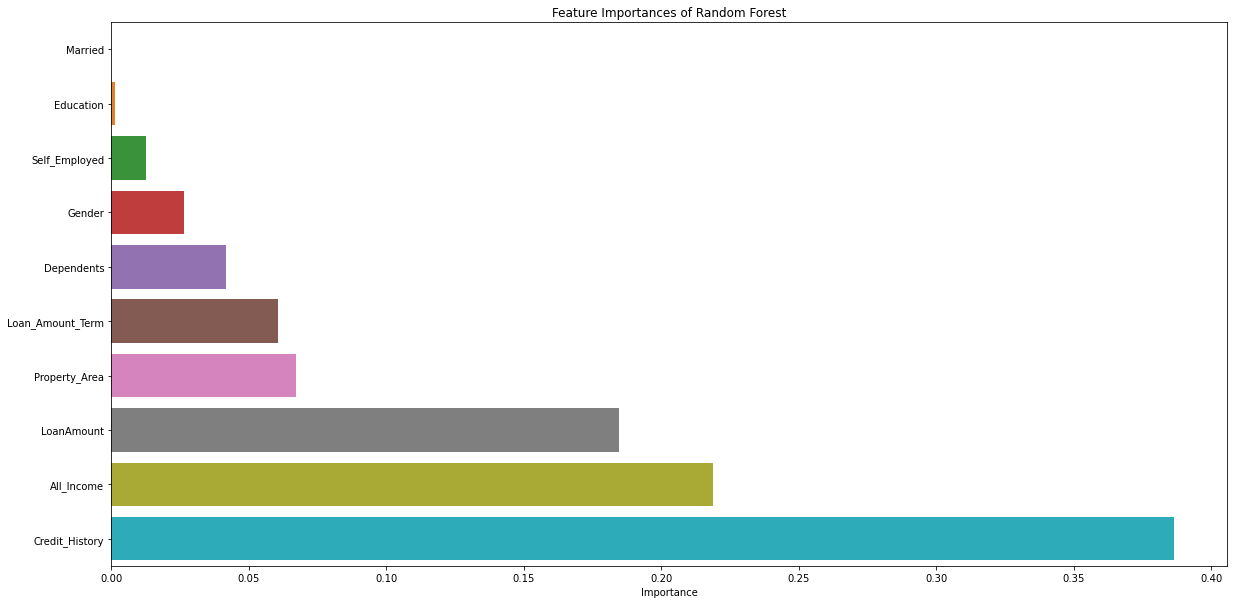

In [186]:
feat2=pd.DataFrame({"Importance": forest_clf.feature_importances_}, 
                  index=x.columns).sort_values(by="Importance")
plt.figure(figsize=(20,10))
plt.title("Feature Importances of Random Forest")

sns.barplot(feat["Importance"],feat.index)

In [187]:
print(classification_report(y_test,pred_test3))

              precision    recall  f1-score   support

           0       0.74      0.62      0.68        32
           1       0.90      0.94      0.92       113

    accuracy                           0.87       145
   macro avg       0.82      0.78      0.80       145
weighted avg       0.86      0.87      0.86       145



In [188]:
pred_rfc = rfc.predict(X_test)
rss = accuracy_score(y_test,pred_rfc)
for k in range(2,10):
    rsscore=cross_val_score(rfc,xs,y,cv=k)
    rsc=rsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",rsc*100)
    print("accuracy score is : ",rss*100)
    print("\n")

At cv=  2
Cross Val score :  81.45905420991926
accuracy score is :  86.89655172413792


At cv=  3
Cross Val score :  81.80411629245826
accuracy score is :  86.89655172413792


At cv=  4
Cross Val score :  81.80435823754789
accuracy score is :  86.89655172413792


At cv=  5
Cross Val score :  81.63418290854572
accuracy score is :  86.89655172413792


At cv=  6
Cross Val score :  81.80126002290952
accuracy score is :  86.89655172413792


At cv=  7
Cross Val score :  81.29591536879224
accuracy score is :  86.89655172413792


At cv=  8
Cross Val score :  81.45690639269407
accuracy score is :  86.89655172413792


At cv=  9
Cross Val score :  81.97649572649573
accuracy score is :  86.89655172413792




At cv=  9
- Cross Val score :  81.97649572649573
- accuracy score is :  86.89655172413792

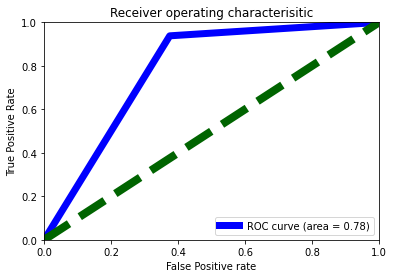

In [189]:
fpr,tpr,thresholds = roc_curve(y_test, pred_test3)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

## Model 4: SVC

In [53]:
from sklearn.svm import SVC

In [54]:
svc_params = {'C':[ 0.01, 0.1, 1.0],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], "gamma":[.001,0.01,0.1,1]}
rand_svc = RandomizedSearchCV(SVC(), svc_params)
rand_svc.fit(X_train, y_train)
# SVC best estimator
svc = rand_svc.best_estimator_
print("Best Parameters for SVM: ", rand_svc.best_params_)
print("Best Score for SVM: ", rand_svc.best_score_)
print("------------------------------------------")

Best Parameters for SVM:  {'kernel': 'poly', 'gamma': 1, 'C': 0.01}
Best Score for SVM:  0.7175438596491228
------------------------------------------


In [55]:
svm = SVC(C=20.0, kernel='rbf',gamma = 0.1).fit(X_train, y_train)
pred_train4 = svm.predict(X_train)
pred_test4 = svm.predict(X_test) 

In [56]:
print(classification_report(y_test,pred_test4))

              precision    recall  f1-score   support

           0       0.46      0.56      0.51        32
           1       0.87      0.81      0.84       113

    accuracy                           0.76       145
   macro avg       0.66      0.69      0.67       145
weighted avg       0.78      0.76      0.77       145



In [58]:
pred_test4 = svm.predict(X_test) 

svms = accuracy_score(y_test,pred_test4)
for k in range(2,10):
    svmsscore=cross_val_score(svm,xs,y,cv=k)
    svmsc=svmsscore.mean()
    print("At cv= ",k)
    print("Cross Val score : ",svmsc*100)
    print("accuracy score is : ",svms*100)
    print("\n")

At cv=  2
Cross Val score :  74.87024221453287
accuracy score is :  75.86206896551724


At cv=  3
Cross Val score :  75.91123344847438
accuracy score is :  75.86206896551724


At cv=  4
Cross Val score :  74.5234674329502
accuracy score is :  75.86206896551724


At cv=  5
Cross Val score :  75.7376311844078
accuracy score is :  75.86206896551724


At cv=  6
Cross Val score :  74.86218499427262
accuracy score is :  75.86206896551724


At cv=  7
Cross Val score :  75.04512824818438
accuracy score is :  75.86206896551724


At cv=  8
Cross Val score :  75.56364155251141
accuracy score is :  75.86206896551724


At cv=  9
Cross Val score :  75.21901709401709
accuracy score is :  75.86206896551724




At cv=  8
- Cross Val score :  75.56364155251141
- accuracy score is :  75.86206896551724

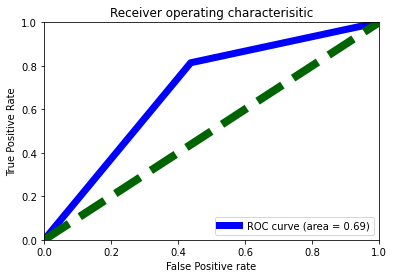

In [59]:
fpr,tpr,thresholds = roc_curve(y_test, pred_test4)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="blue",lw=7,label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0,1],[0,1],color="darkgreen",lw=8,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characterisitic")
plt.legend(loc="lower right")
plt.show()

__Conclusion:__ Random Forest classifier comes out on the top with cv= 9

- Cross Val score : 81.97649572649573
- accuracy score is : 86.89655172413792

In [ ]:
# save the model to disk
import pickle
model_file_path='Loan_Approval_Classification_.pkl'
# pickle.dump(rfc, open(model_file_path, 'wb'))